# Import utils file

In [ ]:
# from utils import extract_all_frames, fixed_average_subtract, moving_average_subtract 

# Save frames from video

In [ ]:
# video_path = "/Users/Malachite/Documents/UW/ARA/Plumes/July_20/video_low_2/low_2.MP4"

# # Optional Arguments
# save_path = "frames" # Default "frames"
# extension = "png" # Default "png"

# # might take a while to run
# # Will save all frames to created folder "frames"
# extract_all_frames(video_path=video_path)

# Appying background subtraction

## Fixed Background subtraction

In [ ]:
# # Frames you want to apply subtraction - be the frames from the extract_all_frames
# frames_path = "path to frames"
# background_range =["start int",  "end int"]

# # Optional Arguments
# frames_range = ["start int", "end int"] # Default is all frames after background range
# save_path = "fixed_avg_frames" # Default "fixed_avg_frames"

# # Will save all frames to folder created from save_path
# fixed_average_subtract(frames_path=frames_path,
#                        background_range=background_range)


# Testing PLUME object

In [ ]:
from models import PLUME
import matplotlib.pyplot as plt
import cv2

In [ ]:
video_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes/plume_videos/July_20/video_high_1/high_1.MP4"
tracker = PLUME(video_path=video_path)

img_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes/plume_videos/July_20/video_high_1/fixed_avg_frames/subtract_0256.png"
img = cv2.imread(img_path)

center = (1587,1008)
tracker.orig_center = center


out_data = tracker.concentric_circle(img, boundary_ring=False, interior_ring=False)

out_img = out_data[0]

plt.imshow(out_img)
plt.xticks([]), plt.yticks([])  
plt.show()

In [ ]:
from utils import learn_center_var

out_data = learn_center_var(img_path=img_path,
                            orig_center=center,
                            boundary_ring=False)
out_img = out_data[0]

plt.imshow(out_img)
plt.xticks([]), plt.yticks([])
plt.show()

## Testing out background subtract

In [ ]:
video_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes/plume_videos/July_20/video_low_1/low_1.MP4"
plume_tracker = PLUME(video_path=video_path)

In [ ]:
back_img = plume_tracker.create_background_img(img_count=600)

In [ ]:
plt.imshow(back_img,cmap="gray")
plt.xticks([]),plt.yticks([])
plt.show()

## Testing Video Clipping

In [ ]:
test = plume_tracker.clip_video(init_frame=940,fin_frame=1400)

In [ ]:
test

## Testing train()

In [1]:
from models import PLUME
# import matplotlib.pyplot as plt
# import cv2

In [2]:
video_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes/plume_videos/July_20/video_high_1/high_1.MP4"
plume_tracker = PLUME(video_path=video_path)

In [ ]:
video_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes/plume_videos/July_20/video_high_1/high_1.MP4"
plume_tracker = PLUME(video_path=video_path)

center = (1587,1008)
plume_tracker.orig_center = center

fixed_range = 722
img_range = [218+fixed_range, 830+fixed_range]

In [ ]:
coeff_data = plume_tracker.train(img_range=img_range,fixed_range = fixed_range)

In [ ]:
# video_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes/plume_videos/July_20/video_low_1/low_1.MP4"
# plume_tracker = PLUME(video_path=video_path)

In [ ]:
# plume_tracker.train(img_range=[940,1400],fixed_range = 600)

## Playing with getting center through notebook

In [7]:
import cv2
import matplotlib.pyplot as plt

class ImagePointPicker:
    def __init__(self, video_path):
        self.video_path = video_path
        self.video_capture = cv2.VideoCapture(video_path)
        self.clicked_point = None

    def mouse_callback(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.clicked_point = (x, y)
            print(f"Clicked at ({x}, {y})")
            cv2.destroyWindow("Image")

    def ask_user(self):
        video_cap = self.video_capture
        tot_frames = int(video_cap.get(cv2.CAP_PROP_FRAME_COUNT))
        middle_frame_id = tot_frames //2
        video_cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame_id)

        ret, frame = video_cap.read()
        print("ret:", ret)

        if ret:
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title("image")
            plt.set_cmap("gray")
            plt.axis('off')
            plt.connect("button_press_event", self.on_click)
            plt.show()

    def on_click(self, event):
        if event.button == 1:
            x,y = int(event.xdata), int(event.ydata)
            self.clicked_point = (x,y)
            print(f"Clicked point: ({x}, {y})")
            plt.close()

        # if ret:
        #     cv2.namedWindow("Image")
        #     cv2.setMouseCallback("Image", self.mouse_callback)
        #     cv2.imshow("Image", frame)

        #     while self.clicked_point is None:
        #         key = cv2.waitKey(1)
        #         if key == 27:
        #             break
            
        #     print("Destroy window")
        #     cv2.destroyWindow("Image")
        #     print("destroyed?")


        # image = cv2.imread(self.img_path)
        # image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # cv2.namedWindow("Image")
        # cv2.setMouseCallback("Image", self.mouse_callback)

        # cv2.imshow("Image", image_gray)

        # while self.clicked_point is None:
        #     cv2.waitKey(1)

In [8]:
video_path = "/Users/Malachite/Documents/UW/ARA/ARA-Plumes/plume_videos/July_20/video_high_1/high_1.MP4"
test = ImagePointPicker(video_path = video_path)

ret: True


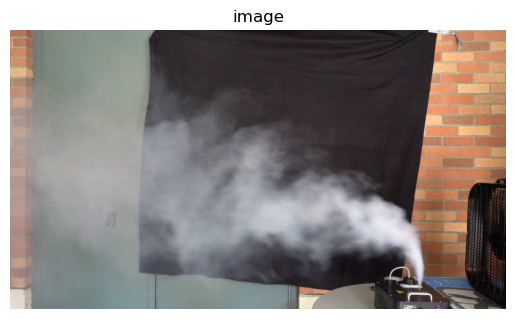

In [9]:
test.ask_user()

6

: 